In [1]:
import pandas as pd 
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../static/data/diabetes_train.csv')
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067,214.0
1,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349,98.0
2,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
feature_name = 'bp'

In [5]:
X = df[feature_name].values.reshape(-1, 1)
y = df.target.values
X.shape, y.shape

((331, 1), (331,))

In [6]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [7]:
weight, bias = lr.coef_, lr.intercept_
print(f'{weight}, {bias}')

[949.31966419], 148.86231887321193


In [8]:
df_test = pd.read_csv('../static/data/diabetes_test.csv')
df_test.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067,214.0
1,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349,98.0


In [9]:
index = 3

In [10]:
X_test = df_test[feature_name][index]   # X_test = df_test.iloc[index, :-1].values
y_test = df_test.target[index]
print(f'{X_test}, {y_test}')

0.07786338762690201, 233.0


In [11]:
pred = X_test * weight[0] + bias
pred

222.77956386803857

- 시각화

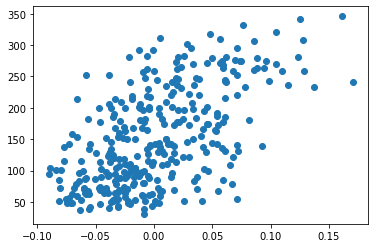

In [12]:
plt.scatter(X, y)
plt.show()

In [13]:
y_min = np.min(X) * weight[0] + bias # X축의 최대치 
y_max = np.max(X) * weight[0] + bias # X축의 최소치 

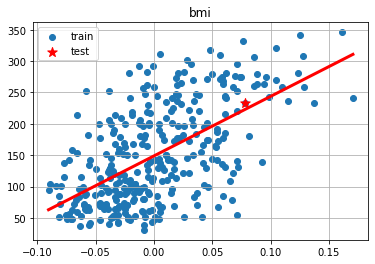

In [14]:
plt.scatter(X, y, label='train')
plt.plot([np.min(X), np.max(X)], [y_min, y_max], 'r', lw=3)
plt.scatter([X_test], [y_test], c='r', marker='*', s=100, label='test')
plt.grid()
plt.legend()
plt.title(f'{feature_name}')
plt.show()